In [8]:
from matplotlib import font_manager, rc 
import matplotlib as mpl
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" #폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"]=False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os

# 서포트 벡터 머신(SVM)

- gradient descent를 사용하든 말든 feature의 크기에 민감하기 때문에 회귀, 분류 모델 둘 다에서 스케일링 필수

## 1) 선형 SVM 분류
- 두 클래스 사이에 가장 폭이 넓은 분류기를 찾음 -> 일반화에 좋을 것
- large margin classification
- **서포트 벡터** : 도로 경계에 위치한 샘플들, 분류기를 찾는데에 영향을 주는 샘플들
- feature의 스케일에 민감
    - 왼쪽그림에서 x1축의 스케일이 x0축 보다 훨씬 커서 경계선이 수평에 가깝게 됨
        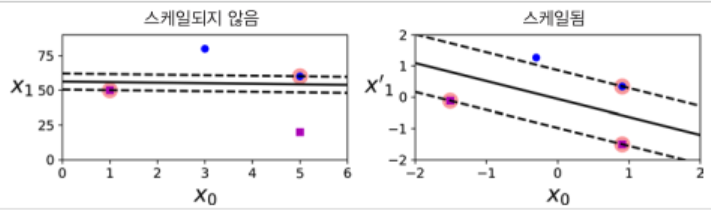
    

### 1-1) 하드 마진 분류
- 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있는 것
- 문제점
    - 모든 데이터가 선형으로 구분 가능해야 함
    - 이상치에 상관없이 모든 샘플을 올바르게 분류해야 하기 때문에 이상치에 민감
    
### 1-2) 소프트 마진 분류
- 도로의 폭을 가능한 넓게 유지하는 것과 마진오류(샘플이 도로 중간이나 심지어 반대쪽에 있는 경우) 사이에 적절한 균형을 잡는 것
- **C** : 마진 오류에 대한 민감도
    - 낮게 설정 : 마진 오류에 대한 민감도가 낮기 때문에 보다 일반화에 용이
    - 높게 설정 : 마진 오류에 대한 민감도가 높기 때문에 보다 오류가 낮은 모델이 나올 수 있음. 하지만 트레인셋에 대한 과대적합의 위험성

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # 선형 SVM

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64) # Iris-Virginica 인지 아닌지에 대한 target 값

svm_clf = Pipeline([("scaler", StandardScaler()),
                   ("linear_svc", LinearSVC(C=1, loss="hinge"))])
# LinearSVC == SGDCLassifier(loss="hinge", alpha=1(m+C)) == SVC(kernel="linear",C=1)

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [4]:
svm_clf.predict([[5.5,1.7]]) # iris-Virginica 이다.

"""
linearSVC : 계산을 통해 구함(빠름, 메모리 많이듦)
SGDClassifier : 경사하강법을 통해 구함(느림, 메모리 좀 적게듦)
(장단점은 linear에서의 장단점과 같음)"""

array([1.])

## 2) 비선형 SVM 분류
- 선형적으로 분류할 수 없는 데이터 셋이 많기 때문에 비선형 분류기 필요

### 2-1) 다항 특성 추가
- 특성들을 거듭제곱을 통해 새로운 특성을 만들어내어 이를 선형적으로 분류
- 모든 머신러닝 알고리즘에서 잘 작동 but
    - 낮은 차수의 다항식 -> 매우 복잡한 데이터셋을 잘 표현하지 못함
    - 높은 차수의 다항식 -> 굉장히 많은 특성을 추가하므로 모델이 느려짐, 오버피팅

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples = 100, noise = 0.15)
# 반드시 새로운 거듭제곱 feature을 만든 후에 scaler을 적용해 주어야 함!
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

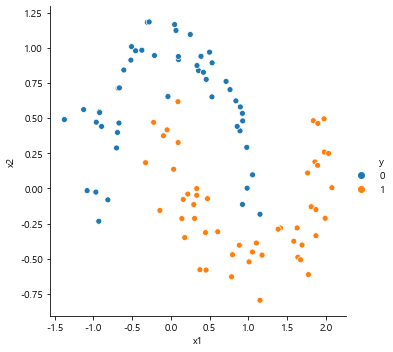

In [16]:
# moon 데이터 시각화 -> 비선형적 데이터
moon = pd.DataFrame(X, columns = ["x1","x2"])
moon["y"]=y
sns.relplot(x="x1", y="x2", hue="y", data=moon)

### 2-2) 다항식 커널
- **커널트릭** -> 수학적 기교를 적용하여 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻음
    - 실제로는 어떠한 특성도 추가하지 않기 때문에 모델을 느리게 만들지 않음
- r(coef0) : 높은 차수와 낮은 차수에 얼마나 영향을 받을지를 조절

In [17]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree = 3, coef0 = 1, C=5))
])
# 3차 다항식 커널을 사용
# coef0 -> 높은 차수와 낮은 차수에 얼마나 영향을 받을지를 조절, 상수항 r에 해당
# 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있음

### 2-3) 유사도 특성
- 유사도 함수로 계산한 특성을 추가하여 선형적으로 구분이 가능하도록 하는 것.
- **유사도 함수** : 각 샘플(벡터 형식)이 특정 랜드마크와 얼마나 닮았는지 측정
- 가우시안 방사 기저 함수(RBF) 를 유사도 함수로 정의
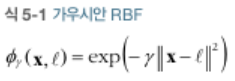

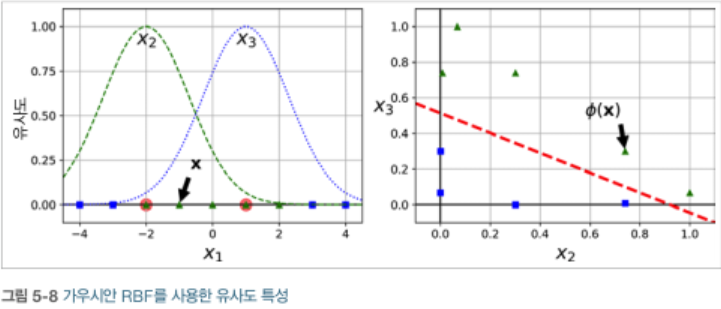
- 랜드마크 선택 방법 : 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정
    - 차원이 매우 커짐에 따라 변환된 훈련 세트가 선형적으로 구분될 가능성이 높음
    - n개의 특성, m개의 데이터 -> m개의 특성, m개의 데이터(원본 특성은 제외한다고 가정)
    - 차원이 매우 커짐에 따라 많은 연산 비용, 시간 소요(데이터 셋이 많을 경우 더욱 더)

### 2-4) 가우시안 RBF 커널
- **커널트릭** -> 수학적 기교를 이용하여 실제로는 유사도 특성을 추가하지 않으면서 유사도 특성을 많이 추가하 것과 비슷한 결과를 얻음
- gamma : 각 샘플의 영향 범위를 조절
    - 증가 : 종모양 그래프가 좁아지면서 각 샘플의 영향 범위 줄어듦
        - 각 샘플간 편차가 커지기 때문에 결정 경계가 조금 더 불규칙, 구불구불하게 휘어짐
        - overfitting의 위험
    - 감소 : 종모양 그래프가 넓어지면서 각 샘플의 영향 범위 늘어남
        - 각 샘플간 편차가 줄얻르면서 결정 경계가 조금 더 부드러워짐.
        - underfitting의 위험

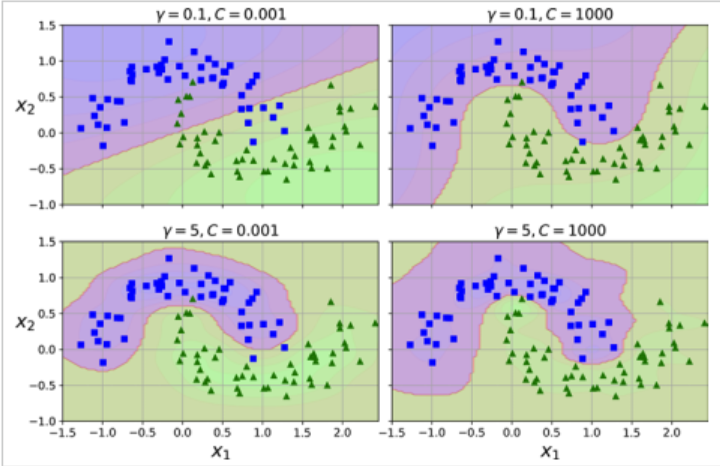

In [ ]:
rbf_kernel_svm_clf = Pipeine([("scaler",StandardScaler()),
                             ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(X,y)

### 2-5) 계산복잡도
- LinearSVC : 최적화된 알고리즘을 구현한 liblinear 라이브러리 기반
    - 훈련샘플이 많고 간단할 때 좋음
- SGDClassifier : gradient descent를 이용하여 최적화
    - LinearSVC보다 다소 느리지만 메모리 덜 필요
- SVC : 커널 트릭 알고리즘을 구현한 libsvm 라이브러리 기반
    - 훈련샘플이 적당하고 복잡할 때 좋음
    - feature에는 덜 민감
    - 희소 특성인 경우에 잘 확장
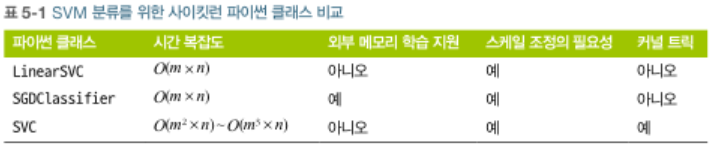

## 3) SVM 회귀
- 선형, 비선형 분류뿐만 아니라 선형, 비선형 회귀에도 사용 가능
- 일정한 마진 오류 안에 도로 안에 가능한 한 많은 샘플이 들어가도록 학습
- tol : 허용 오차
- epsilon : 도로의 폭(margin)을 정하는 하이퍼파라미터
    - epsilon 이 크면 많은 데이터들이 도로 안으로 들어오게 됨
        - 과대적합의 우려
    - epsilon 이 작으면 적은 데이터들이 도로 안으로 들어옴
        - 과소적합의 우려
    - 마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없음

In [18]:
from sklearn.svm import LinearSVR # 훈련 세트의 크기에 비례해서 선형적으로 시간 증가

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [19]:
from sklearn.svm import SVR # 훈련 세트의 크기가 커지면 폭발적으로 시간 증가

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)